## CSC 447 Final Project
Presented by Jawad Kabir

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("Self-Reported_Drinking_Water_Tank_Inspection_Results_20250502.csv")

## 🏙️ Dataset Overview

The dataset used in this project is the **Self-Reported Drinking Water Tank Inspection Results** from NYC Open Data. It includes over **55,000 entries** spanning from **2018 to 2025**, where building owners across New York City self-report the status of their rooftop drinking water tanks.

Each record contains:
- **Geographic data**: Borough, ZIP code, coordinates
- **Structural inspections**: Internal/external structure, overflow pipes, ladders, vents
- **Sanitary indicators**: Presence of debris, insects, sediment, biological growth, birds, or rodents
- **Biological safety**: Presence of coliform or E. coli bacteria
- **Outcome label**: Whether the tank meets Department of Health (DOH) standards

This dataset provides a detailed view of drinking water tank safety across the city and serves as a basis for both unsupervised and supervised analysis.

In [3]:
df.head()

,BIN,BOROUGH,ZIP,HOUSE_NUM,STREET_NAME,BLOCK,LOT,CONFIRMATION_NUM,REPORTING_YEAR,TANK_NUM,...,MEET_STANDARDS,DELETED,LATITUDE,LONGITUDE,COMMUNITY_BOARD,COUNCIL_DISTRICT,CENSUS_TRACT,BBL,NTA,BATCH_DATE
0,1016096.0,MANHATTAN,10003.0,5,East 16th Street,844,7501,WTI3191689946,2020,1,...,NaN,No,40.737196,-73.992307,5.0,2.0,52.0,1.008448e+09,Hudson Yards-Chelsea-Flatiron-Union Square,05/02/2025 12:15:27 PM
1,1079341.0,MANHATTAN,10029.0,310,East 102nd Street,1673,6,WTI7977139904,2020,1,...,Y,No,40.787881,-73.943925,11.0,8.0,164.0,1.016730e+09,East Harlem South,05/02/2025 12:15:41 PM
2,1028160.0,MANHATTAN,10023.0,37,West 65th Street,1118,5,WTI0840233874,2023,1,...,NaN,No,40.772281,-73.980363,7.0,6.0,149.0,1.011180e+09,Lincoln Square,05/02/2025 12:15:27 PM
3,1007832.0,MANHATTAN,10014.0,2,CHARLTON STREET,506,27,WTI9325086151,2018,1,...,Y,No,40.726980,-74.003763,2.0,3.0,37.0,1.005060e+09,SoHo-TriBeCa-Civic Center-Little Italy,05/02/2025 12:15:20 PM
4,1036451.0,MANHATTAN,10022.0,560,LEXINGTON AVENUE,1305,13,WTI3391983683,2017,1,...,Y,No,40.756651,-73.972264,5.0,4.0,100.0,1.013050e+09,Turtle Bay-East Midtown,05/02/2025 12:15:12 PM


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55768 entries, 0 to 55767
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BIN                           55676 non-null  float64
 1   BOROUGH                       55768 non-null  object 
 2   ZIP                           55689 non-null  float64
 3   HOUSE_NUM                     55768 non-null  object 
 4   STREET_NAME                   55768 non-null  object 
 5   BLOCK                         55768 non-null  int64  
 6   LOT                           55768 non-null  int64  
 7   CONFIRMATION_NUM              55768 non-null  object 
 8   REPORTING_YEAR                55768 non-null  int64  
 9   TANK_NUM                      55768 non-null  int64  
 10  INSPECTION_BY_FIRM            55746 non-null  object 
 11  INSPECTION_PERFORMED          55768 non-null  object 
 12  INSPECTION_DATE               55746 non-null  object 
 13  G

In [5]:
print(df.columns)
print(df.isna().sum())
df.dropna(how="all")

Index(['BIN', 'BOROUGH', 'ZIP', 'HOUSE_NUM', 'STREET_NAME', 'BLOCK', 'LOT',
       'CONFIRMATION_NUM', 'REPORTING_YEAR', 'TANK_NUM', 'INSPECTION_BY_FIRM',
       'INSPECTION_PERFORMED', 'INSPECTION_DATE', 'GI_REQ_INTERNAL_STRUCTURE',
       'GI_RESULT_INTERNAL_STRUCTURE', 'GI_REQ_EXTERNAL_STRUCTURE',
       'GI_RESULT_EXTERNAL_STRUCTURE', 'GI_REQ_OVERFLOW_PIPES',
       'GI_RESULT_OVERFLOW_PIPES', 'GI_REQ_ACCESS_LADDERS',
       'GI_RESULT_ACCESS_LADDERS', 'GI_REQ_AIR_VENTS', 'GI_RESULT_AIR_VENTS',
       'GI_REQ_ROOF_ACCESS', 'GI_RESULT_ROOF_ACCESS', 'SI_REQ_SEDIMENT',
       'SI_RESULT_SEDIMENT', 'SI_REQ_BIOLOGICAL_GROWTH',
       'SI_RESULT_BIOLOGICAL_GROWTH', 'SI_REQ_DEBRIS_INSECTS',
       'SI_RESULT_DEBRIS_INSECTS', 'SI_REQ_RODENT_BIRD',
       'SI_RESULT_RODENT_BIRD', 'SAMPLE_COLLECTED', 'LAB_NAME',
       'NYS_CERTIFIED', 'ANALYTES', 'COLIFORM', 'ECOLI', 'MEET_STANDARDS',
       'DELETED', 'LATITUDE', 'LONGITUDE', 'COMMUNITY_BOARD',
       'COUNCIL_DISTRICT', 'CENSUS_TRACT', 'B

,BIN,BOROUGH,ZIP,HOUSE_NUM,STREET_NAME,BLOCK,LOT,CONFIRMATION_NUM,REPORTING_YEAR,TANK_NUM,...,MEET_STANDARDS,DELETED,LATITUDE,LONGITUDE,COMMUNITY_BOARD,COUNCIL_DISTRICT,CENSUS_TRACT,BBL,NTA,BATCH_DATE
0,1016096.0,MANHATTAN,10003.0,5,East 16th Street,844,7501,WTI3191689946,2020,1,...,NaN,No,40.737196,-73.992307,5.0,2.0,52.0,1.008448e+09,Hudson Yards-Chelsea-Flatiron-Union Square,05/02/2025 12:15:27 PM
1,1079341.0,MANHATTAN,10029.0,310,East 102nd Street,1673,6,WTI7977139904,2020,1,...,Y,No,40.787881,-73.943925,11.0,8.0,164.0,1.016730e+09,East Harlem South,05/02/2025 12:15:41 PM
2,1028160.0,MANHATTAN,10023.0,37,West 65th Street,1118,5,WTI0840233874,2023,1,...,NaN,No,40.772281,-73.980363,7.0,6.0,149.0,1.011180e+09,Lincoln Square,05/02/2025 12:15:27 PM
3,1007832.0,MANHATTAN,10014.0,2,CHARLTON STREET,506,27,WTI9325086151,2018,1,...,Y,No,40.726980,-74.003763,2.0,3.0,37.0,1.005060e+09,SoHo-TriBeCa-Civic Center-Little Italy,05/02/2025 12:15:20 PM
4,1036451.0,MANHATTAN,10022.0,560,LEXINGTON AVENUE,1305,13,WTI3391983683,2017,1,...,Y,No,40.756651,-73.972264,5.0,4.0,100.0,1.013050e+09,Turtle Bay-East Midtown,05/02/2025 12:15:12 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55763,1042508.0,MANHATTAN,10021.0,955,LEXINGTON AVE,1404,52,WTI8933526969,2024,1,...,NaN,No,40.768868,-73.963328,8.0,4.0,120.0,1.014040e+09,Upper East Side-Carnegie Hill,05/02/2025 12:15:35 PM
55764,3397571.0,BROOKLYN,11231.0,505,COURT STREET,476,7501,WTI1632579960,2017,1,...,Y,No,40.675574,-73.999156,6.0,39.0,77.0,3.004768e+09,Carroll Gardens-Columbia Street-Red Hook,05/02/2025 12:15:09 PM
55765,1089411.0,MANHATTAN,10001.0,15,Hudson Yards,702,7502,WTI3615089045,2020,5,...,NaN,No,40.753632,-74.003541,4.0,3.0,99.0,1.007028e+09,Hudson Yards-Chelsea-Flatiron-Union Square,05/02/2025 12:15:41 PM
55766,1024995.0,MANHATTAN,10036.0,330,West 45th Street,1035,47,WTI5426572966,2018,1,...,NaN,No,40.759590,-73.989431,4.0,3.0,121.0,1.010350e+09,Clinton,05/02/2025 12:15:19 PM


# EDA

In [6]:
df["MEET_STANDARDS"] = df["MEET_STANDARDS"].replace({"Y": True, "N": False})

# based on the form they fill out
df["COLIFORM"] = df["COLIFORM"].replace({"P": True, "A": False}) 
df["ECOLI"] = df["ECOLI"].replace(
    {"P": True, "A": False}
)  # based on the form they fill out

In [7]:
print("Duplicates:", df.duplicated().sum())
print(
    "\nStandards Distributions:\n",
    df["MEET_STANDARDS"].value_counts(normalize=True),
    sep="",
)
print(
    "\nColiform Distributions:\n", df["COLIFORM"].value_counts(normalize=True), sep=""
)

print(
    "\nEcoli Distributions:\n", df["ECOLI"].value_counts(normalize=True), sep=""
)

Duplicates: 0

Standards Distributions:
MEET_STANDARDS
True     0.999011
False    0.000989
Name: proportion, dtype: float64

Coliform Distributions:
COLIFORM
False    0.999694
True     0.000306
Name: proportion, dtype: float64

Ecoli Distributions:
ECOLI
False    0.999676
True     0.000324
Name: proportion, dtype: float64


In [8]:
print('Unique Values in "MEET_STANDARDS":', df["MEET_STANDARDS"].unique())
num_nas = df["MEET_STANDARDS"].isna().sum()
num_values = df.shape[0]

print(f'Num NAN in "MEET_STANDARDS": {round(num_nas / num_values, 5) * 100}%')

print()

print('Unique Values in "COLIFORM":', df["COLIFORM"].unique())
num_nas = df["COLIFORM"].isna().sum()
num_values = df.shape[0]

print(f'Num NAN in "COLIFORM": {round(num_nas / num_values, 5) * 100}%')

print()

print('Unique Values in "ECOLI":', df["ECOLI"].unique())
num_nas = df["ECOLI"].isna().sum()
num_values = df.shape[0]

print(f'Num NAN in "ECOLI": {round(num_nas / num_values, 5) * 100}%')

Unique Values in "MEET_STANDARDS": [nan True False]
Num NAN in "MEET_STANDARDS": 80.048%

Unique Values in "COLIFORM": [False nan True]
Num NAN in "COLIFORM": 0.244%

Unique Values in "ECOLI": [False nan True]
Num NAN in "ECOLI": 0.244%


In [9]:
relevant_features = ["ECOLI", "COLIFORM", "MEET_STANDARDS"]

descriptive_stats = df[relevant_features].agg(["mean", "median", "std"])
print(descriptive_stats)

           ECOLI  COLIFORM  MEET_STANDARDS
mean    0.000324  0.000306        0.999011
median  0.000000  0.000000        1.000000
std     0.017985  0.017478        0.031428


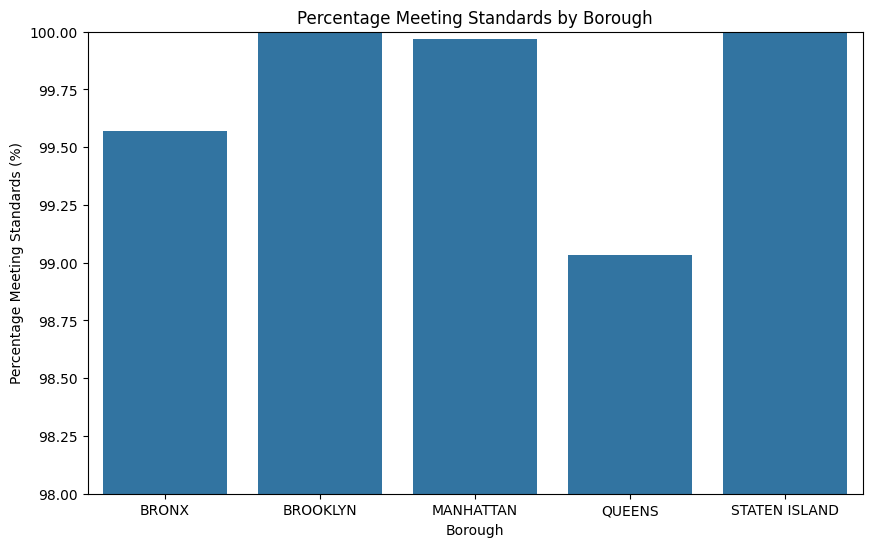

In [10]:
borough_pct = df.groupby('BOROUGH')['MEET_STANDARDS'].mean() * 100
borough_pct = borough_pct.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=borough_pct, x='BOROUGH', y='MEET_STANDARDS', errorbar=None)
plt.title("Percentage Meeting Standards by Borough")
plt.ylabel("Percentage Meeting Standards (%)")
plt.xlabel("Borough")
plt.ylim(98, 100)
plt.show()

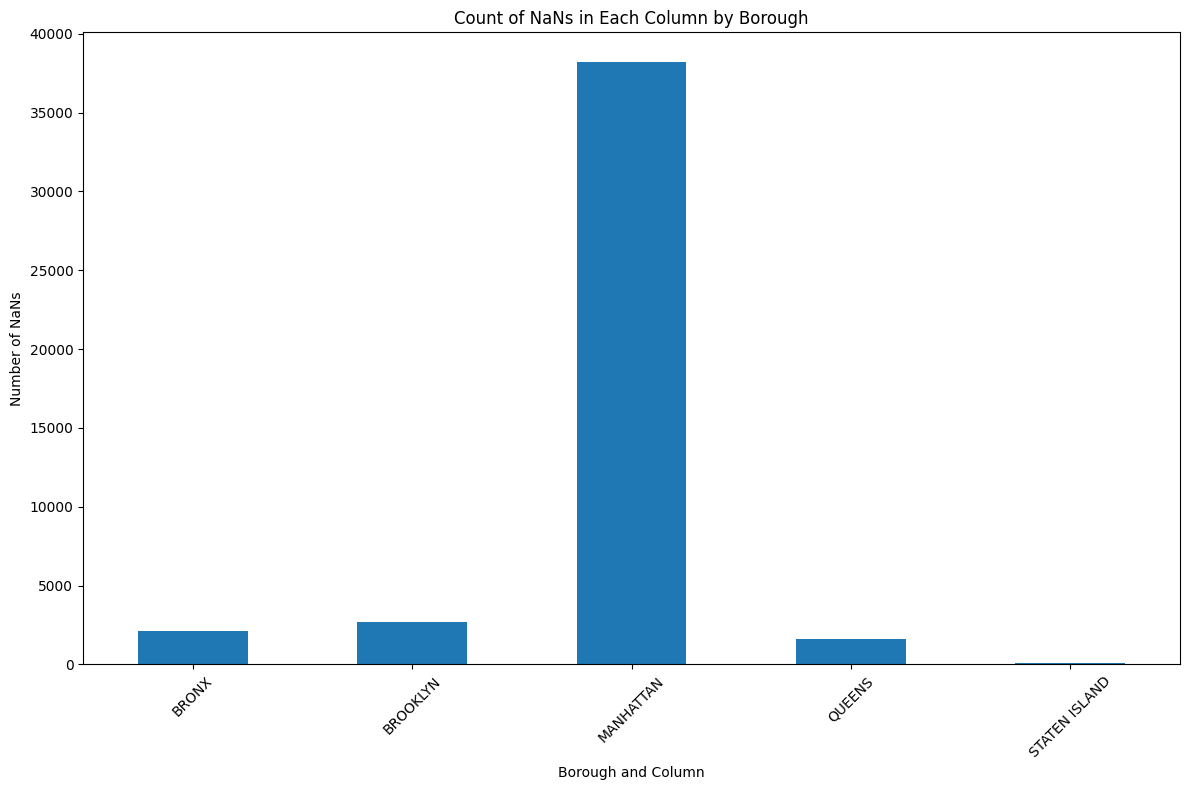

In [11]:
import matplotlib.pyplot as plt

nan_counts_by_borough = df.groupby('BOROUGH')['MEET_STANDARDS'].apply(lambda x: x.isna().sum())

nan_counts_by_borough.plot(kind="bar", figsize=(12, 8))
plt.title("Count of NaNs in Each Column by Borough")
plt.ylabel("Number of NaNs")
plt.xlabel("Borough and Column")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

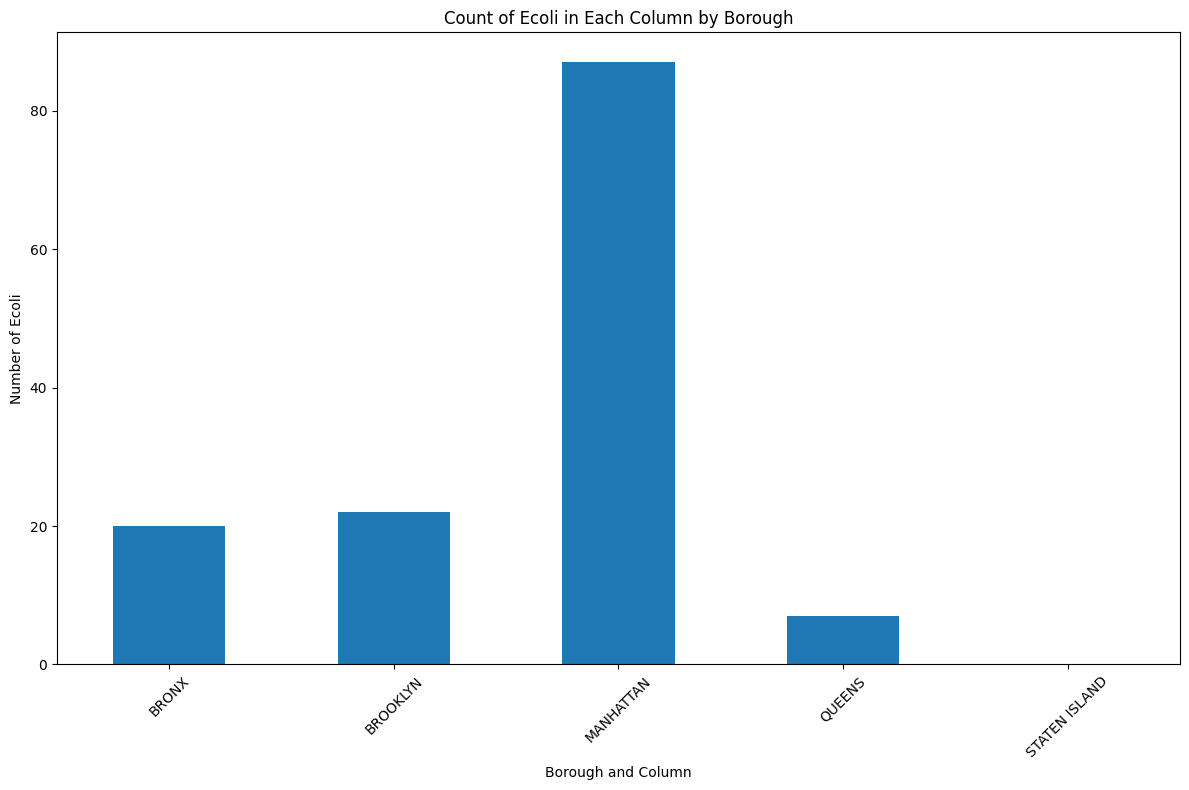

In [12]:
import matplotlib.pyplot as plt

nan_counts_by_borough = df.groupby("BOROUGH")["ECOLI"].apply(
    lambda x: x.isna().sum()
)

nan_counts_by_borough.plot(kind="bar", figsize=(12, 8))
plt.title("Count of Ecoli in Each Column by Borough")
plt.ylabel("Number of Ecoli")
plt.xlabel("Borough and Column")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

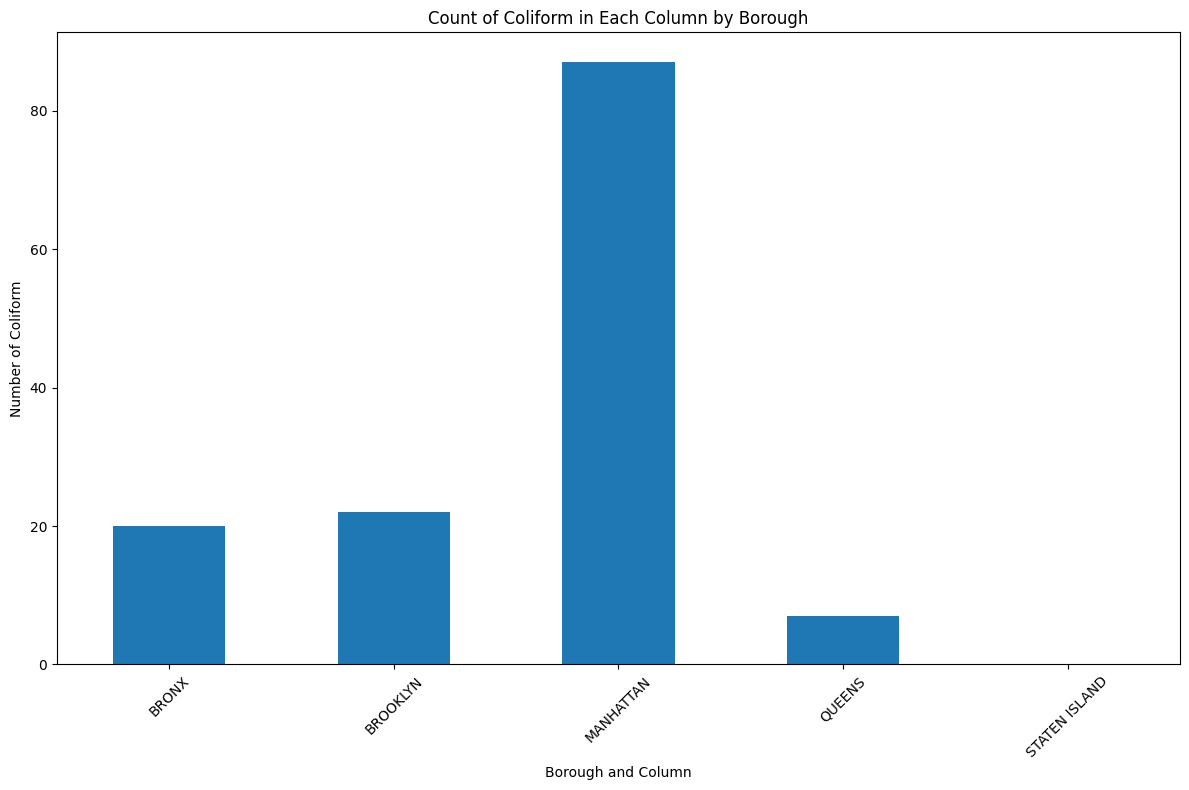

In [13]:
import matplotlib.pyplot as plt

nan_counts_by_borough = df.groupby("BOROUGH")["COLIFORM"].apply(lambda x: x.isna().sum())

nan_counts_by_borough.plot(kind="bar", figsize=(12, 8))
plt.title("Count of Coliform in Each Column by Borough")
plt.ylabel("Number of Coliform")
plt.xlabel("Borough and Column")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Water Quality Parameters by Borough

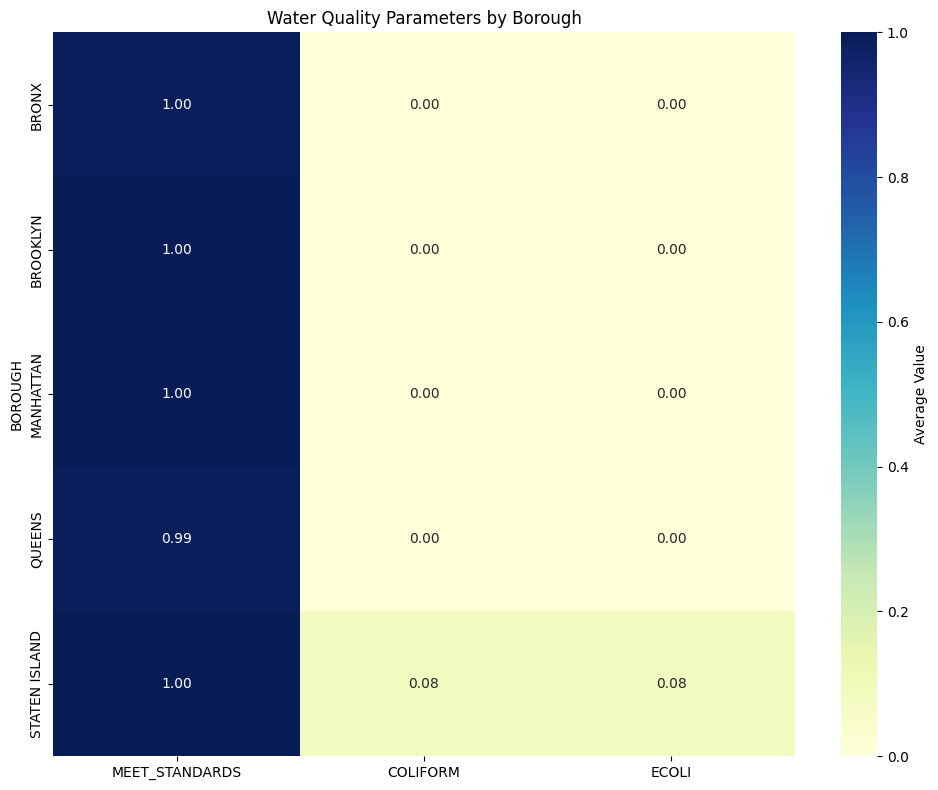

In [14]:
df["MEET_STANDARDS"] = pd.to_numeric(df["MEET_STANDARDS"], errors="coerce")
df["COLIFORM"] = pd.to_numeric(df["COLIFORM"], errors="coerce")
df["ECOLI"] = pd.to_numeric(df["ECOLI"], errors="coerce")


water_params = ["MEET_STANDARDS", "COLIFORM", "ECOLI"]
heatmap_data = df.groupby("BOROUGH")[water_params].mean()

plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    cmap="YlGnBu",
    fmt=".2f",
    cbar_kws={"label": "Average Value"},
)
plt.title("Water Quality Parameters by Borough")
plt.tight_layout()
plt.show()

In [15]:
df["YEAR"] = pd.to_datetime(df["BATCH_DATE"]).dt.year

print("Unique Years in Dataset", df["YEAR"].unique())

Unique Years in Dataset [2025]


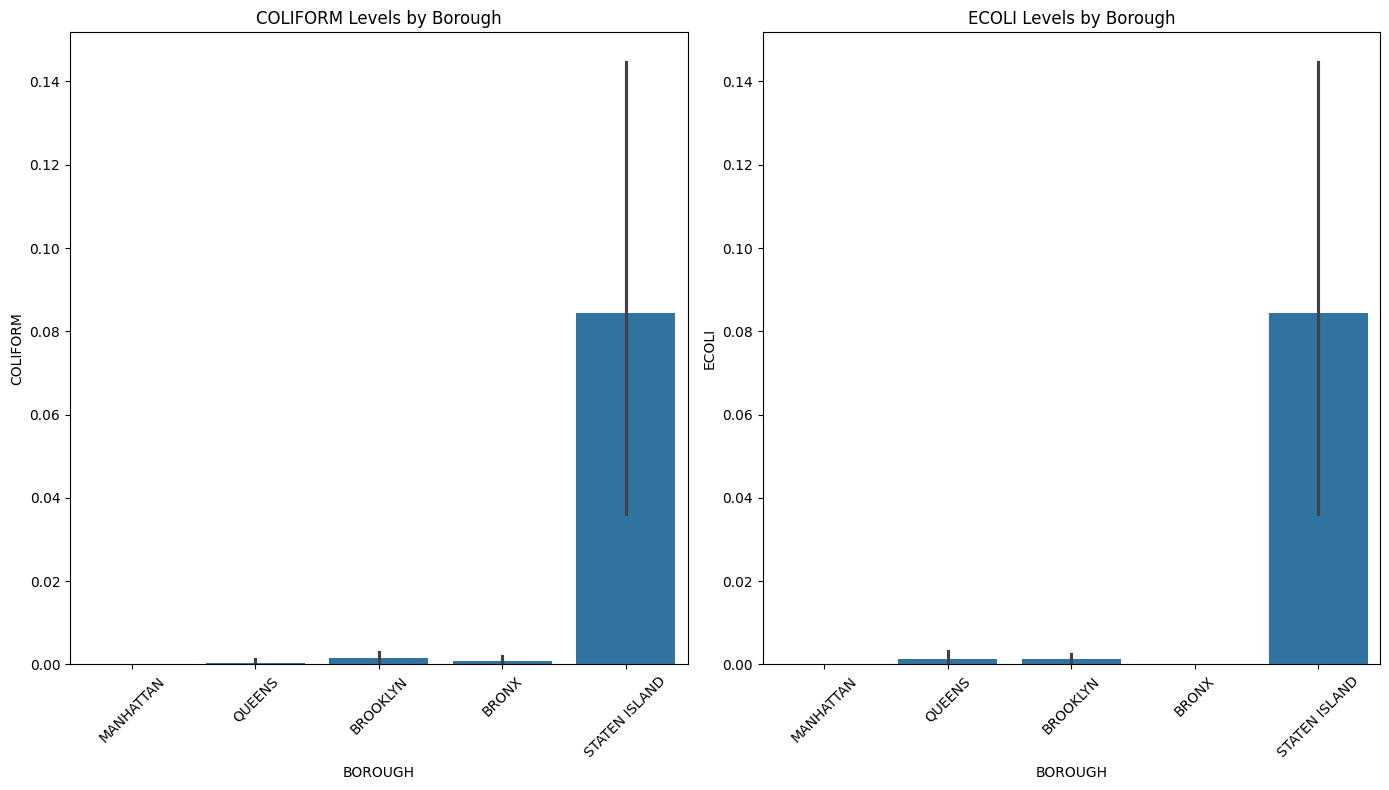

In [16]:
plt.figure(figsize=(14, 8))
params_to_plot = ["COLIFORM", "ECOLI"]

for i, param in enumerate(params_to_plot):
    plt.subplot(1, len(params_to_plot), i + 1)
    sns.barplot(x="BOROUGH", y=param, data=df)
    plt.title(f"{param} Levels by Borough")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

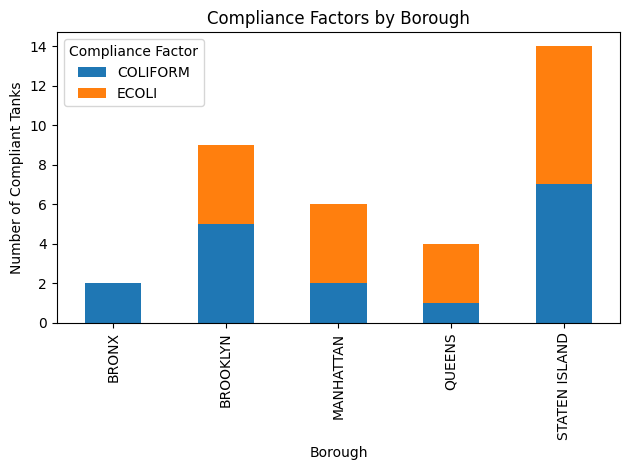

In [17]:
compliance_cols = ["COLIFORM", "ECOLI"]
compliance_counts = df.groupby("BOROUGH")[compliance_cols].sum()

plt.figure(figsize=(12, 6))
compliance_counts.plot(kind="bar", stacked=True)
plt.title("Compliance Factors by Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Compliant Tanks")
plt.legend(title="Compliance Factor")
plt.tight_layout()
plt.show()

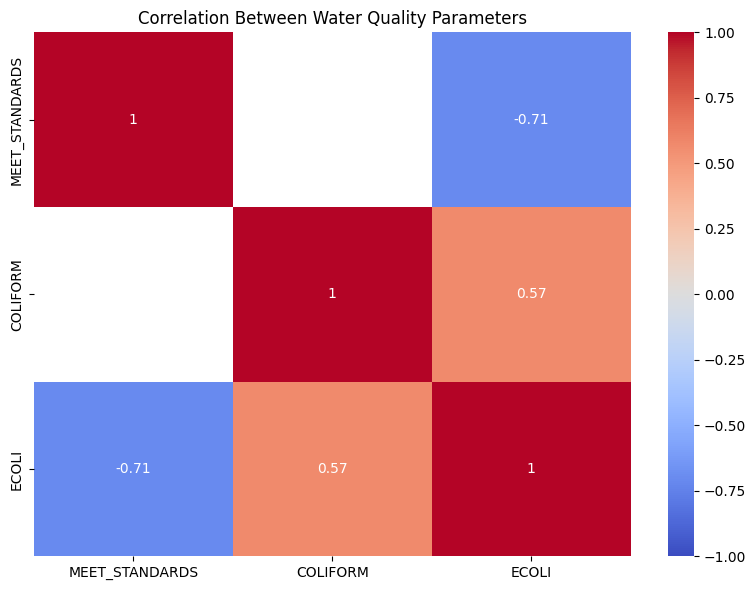

In [18]:
corr_columns = ["MEET_STANDARDS", "COLIFORM", "ECOLI"]
corr_matrix = df[corr_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Between Water Quality Parameters")
plt.tight_layout()
plt.show()

## 🎯 Project Goal

Our primary goal is to assess whether **structural and sanitary conditions** of water tanks show distinct patterns across NYC and whether these conditions can help **predict compliance with health standards**.

We split the project into two parts:
- **Unsupervised Clustering**: To explore natural groupings of tanks based on condition
- **Supervised Classification**: To predict if a tank meets DOH standards using inspection results


## 🤔 Hypotheses

1. **Clustering Hypothesis**:  
   Water tanks will form **distinct clusters** based on structural and sanitary conditions.  
   These clusters may align with specific **boroughs**, revealing geographic disparities.

2. **Classification Hypothesis**:  
   Certain inspection results (like **coliform presence** or **debris detection**) are strong indicators of a tank **failing** DOH standards.  
   These patterns can be captured using classification models.

## 🧠 Methodology

### Clustering:
- **Feature selection**: Chose relevant features such as coliform presence, borough, and all `GI_RESULT_` structural checks.
- **Encoding**: Used one-hot encoding to convert categorical features to numeric form.
- **Missing data**: Dropped rows with missing values in key inspection columns.
- **Clustering**: Applied **K-Means clustering**, experimenting with different values of `k`.
- **Evaluation**: Used the **Elbow Method** to find optimal `k` and **Silhouette Score** to evaluate cluster separation.
- **Visualization**: Used **PCA** to reduce dimensionality and visualize clusters in 2D.

### Classification:
- **Label**: Used `MEET_STANDARDS` as the binary outcome (`Y`/`N`).
- **Baseline model**: Logistic regression
- **Advanced models**: Random Forest, Gradient Boosting
- **Metrics**: Accuracy, precision, recall, F1-score

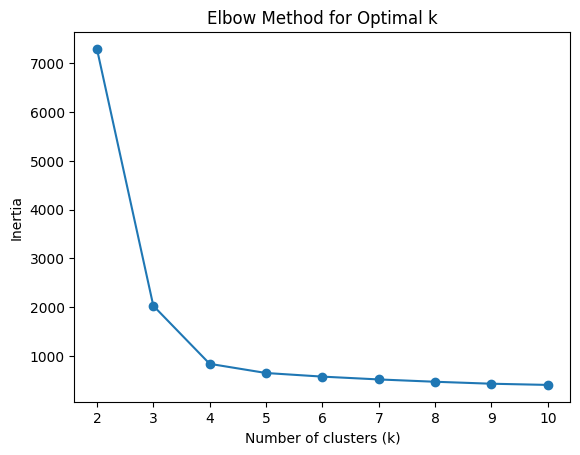

In [19]:
#going to redefine the data 
from sklearn.cluster import KMeans
gi_cols = [col for col in df.columns if col.startswith('GI_RESULT')]
features = ['BOROUGH', 'COLIFORM'] + gi_cols
data = df[features].dropna()

# One-hot encode categorical features
data_enc = pd.get_dummies(data, columns=features, drop_first=True)

# Elbow method to find optimal k
inertias = []
K = range(2, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(data_enc)
    inertias.append(km.inertia_)

plt.figure()
plt.plot(K, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


We can see that the optimal k we should use is either 4 or 5. lets use 5

In [20]:
k_opt = 5
kmeans = KMeans(n_clusters=k_opt, random_state=42)
clusters = kmeans.fit_predict(data_enc)
data['cluster'] = clusters

In [21]:
from sklearn.metrics import silhouette_score
score = silhouette_score(data_enc, clusters) #get silhouette score to evaluate the clustering
print(f"Silhouette Score for k={k_opt}: {score:.3f}")

#Cluster counts
cluster_counts = data['cluster'].value_counts().sort_index().to_frame('count')
print("\nCluster Counts:")
print(cluster_counts)

Silhouette Score for k=5: 0.985

Cluster Counts:
         count
cluster       
0        47419
1         2582
2         3246
3         2194
4           69


As we can see with our silhouette score, we have really strong and well-separated clusters. Points are close to their own respective cluster centroid, and clusters have low inter-cluster similarity (clusters are distinct and dont overlap)

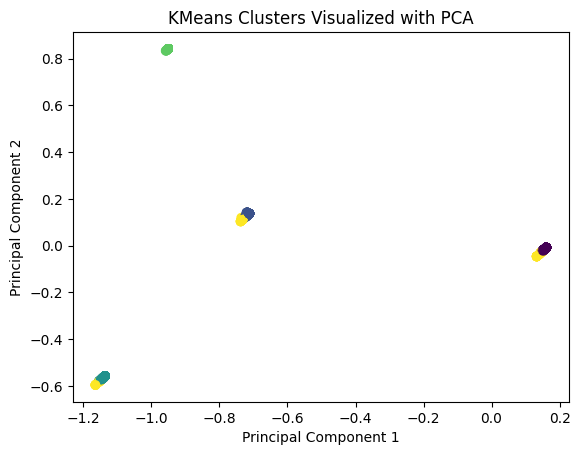

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
components = pca.fit_transform(data_enc)

plt.figure()
plt.scatter(components[:, 0], components[:, 1], c=clusters)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clusters Visualized with PCA')
plt.show()

Now we'll see these clusters per borough to get meaningful answers to our first hypothesis 

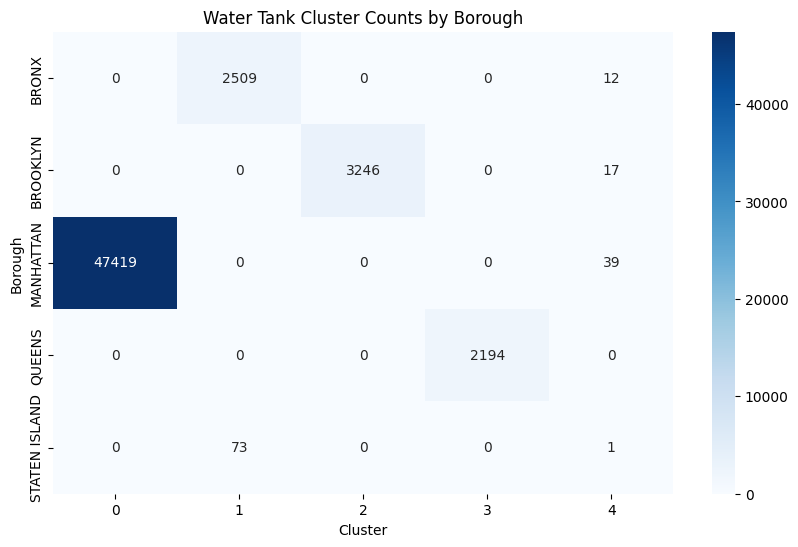

In [23]:
df_clusters = df.loc[data.index].copy()
df_clusters['cluster'] = data['cluster'].values

# Group by borough and cluster
borough_cluster_counts = df_clusters.groupby(['BOROUGH', 'cluster']).size().unstack(fill_value=0)

import seaborn as sns
import matplotlib.pyplot as plt

# Display as heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(borough_cluster_counts, annot=True, fmt='d', cmap='Blues')
plt.title("Water Tank Cluster Counts by Borough")
plt.ylabel("Borough")
plt.xlabel("Cluster")
plt.show()

We can see that the clusters are not evenly distributed across the boroughs. Some boroughs have a higher concentration of certain clusters, indicating that the water quality parameters and inspection results may vary significantly by location.

It's interesting to see manhattan dominate as much as it does over the first cluster, cluster 0, and our last cluster, cluster 4, has a mix of 4 boroughs (realistically its 3 since 1 isnt representative enough)